In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   
import seaborn as sns  
df = pd.read_csv('Archivos_higienizados/Higienizado_20240207.csv') 
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Hora'] = df['Fecha'].dt.hour
df['Dia'] = df['Fecha'].dt.strftime('%A')
df['Agente'].fillna('No agent', inplace=True)
df['Calificacion'].fillna('NO CALIFICADO', inplace=True)


In [3]:
contacto_efectivo = df[df['Calificacion'] == 'CONTACTO EFECTIVO']
agregaded_data = df.groupby(['Agente', 'Hora']).agg({'Calificacion' : 'count'}).reset_index()
contacto_efectivo_data = contacto_efectivo.groupby(['Agente', 'Hora']).agg({'Calificacion': 'count'}).reset_index()
resultados = pd.merge(agregaded_data, contacto_efectivo_data, on=['Agente', 'Hora'], suffixes=['_Total', '_Contacto'])
resultados['Porcentaje contacto'] = (resultados['Calificacion_Contacto']/resultados['Calificacion_Total'])*100
resultados['Porcentaje contacto'] = resultados['Porcentaje contacto'].round(0)  # Redondear a dos decimales
resultados

#resultados.to_csv('resultados por agente.csv')

,Agente,Hora,Calificacion_Total,Calificacion_Contacto,Porcentaje contacto
0,ROSA GRACIELA GONZALEZ CABRERA,14,22,16,73.0
1,ROSA GRACIELA GONZALEZ CABRERA,15,26,21,81.0
2,ROSA GRACIELA GONZALEZ CABRERA,16,7,5,71.0
3,ROSA GRACIELA GONZALEZ CABRERA,17,9,7,78.0
4,ROSA GRACIELA GONZALEZ CABRERA,18,7,7,100.0
...,...,...,...,...,...
124,YOMARA CONCEPCION COTARDO YANEZ,9,44,44,100.0
125,YOMARA CONCEPCION COTARDO YANEZ,10,49,46,94.0
126,YOMARA CONCEPCION COTARDO YANEZ,11,33,33,100.0
127,YOMARA CONCEPCION COTARDO YANEZ,12,19,19,100.0


Hora                                    8      9      10     11     12     13  \
Agente                                                                          
 ROSA GRACIELA GONZALEZ CABRERA        NaN    NaN    NaN    NaN    NaN    NaN   
ANA MARIA PANIAGUA VAZQUEZ             NaN    NaN    NaN    NaN    NaN    NaN   
ARTURO GUADARRAMA SANCHEZ            100.0  100.0  100.0  100.0  100.0  100.0   
CHRISTIAN ELIZABETH BURGOS CASTILLO   67.0   84.0   79.0   83.0   79.0   85.0   
DARIEN OMAR RAMOS GARCIA              50.0   64.0   69.0   71.0   73.0   67.0   
EMMANUEL OLIVERA FREGOSA               NaN    NaN    NaN    NaN    NaN    NaN   
FRANCISCO ESTEBAN AQUINO ORTEGA        NaN   33.0   88.0   77.0   91.0   75.0   
FRANCISCO JAVIER BARRERAS BONILLA     56.0  100.0   69.0   76.0   80.0  100.0   
GEOVANI MORALES FLORES                92.0   95.0   85.0  100.0   98.0  100.0   
GOMEZ CRISTHIAN SANCHEZ                NaN    NaN    NaN  100.0    NaN    NaN   
GUADALUPE MARCELINA LOPEZ HE

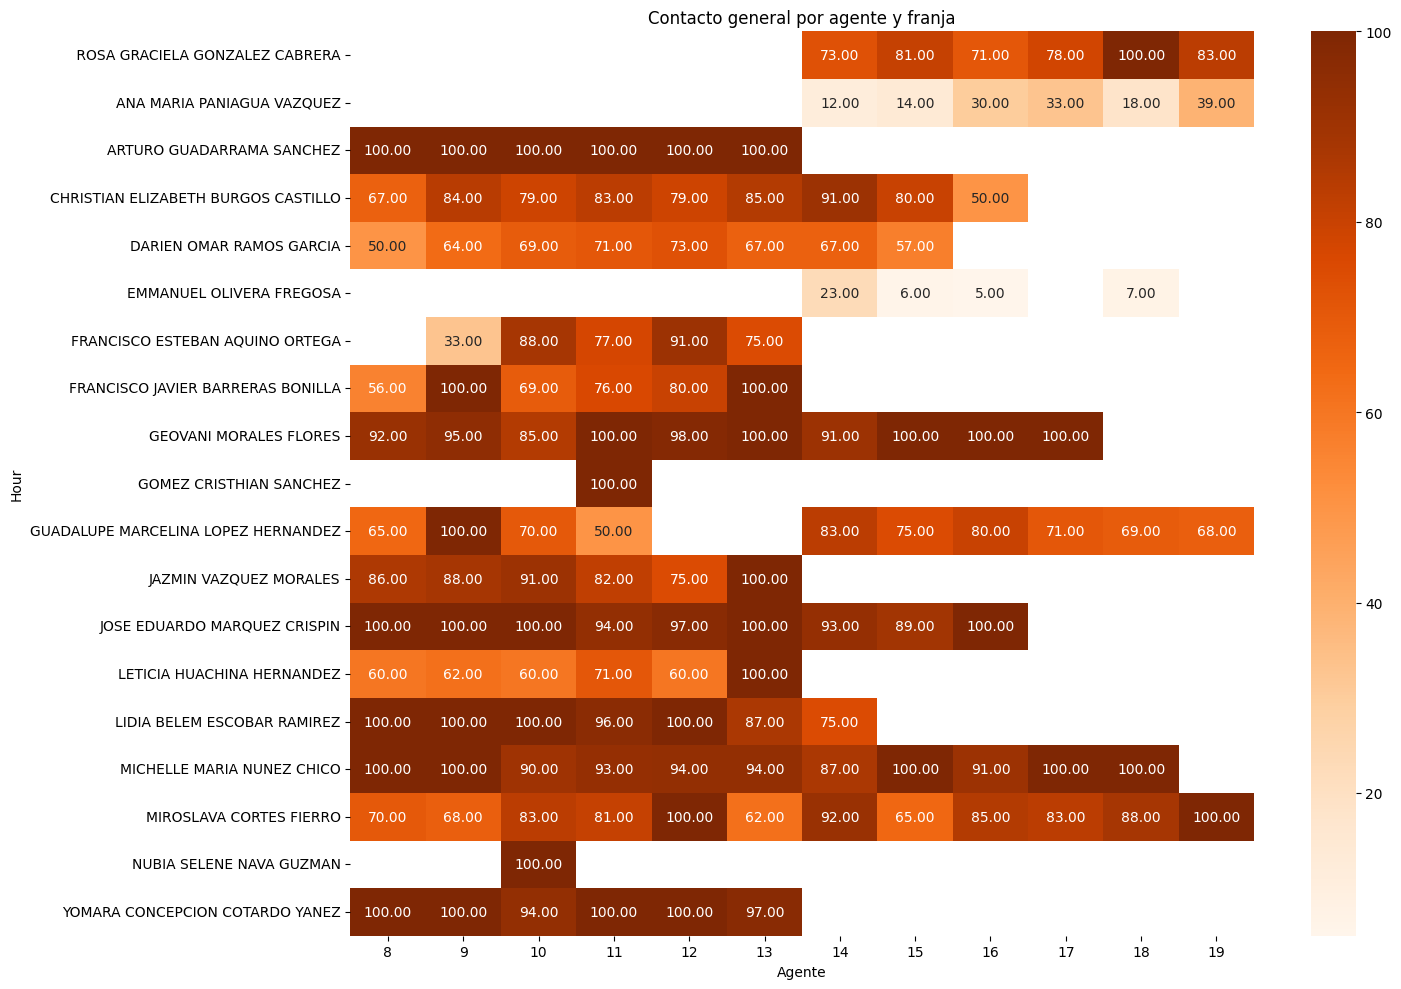

: 

In [4]:
plt.figure(figsize=(15,10))
pivot_table = resultados.pivot_table(index='Agente', columns='Hora', values='Porcentaje contacto')


print(pivot_table)

# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('Contacto general por agente y franja')
plt.xlabel('Agente')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()